# Below shows the questions which I am not that good at, so better review and understand further later!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
sales = pd.read_csv(
    'data/sales_data.csv',
    parse_dates=['Date'])

Go ahead and show a <b>density (KDE)</b> and a <b>box plot</b> with the `Customer_Age` data:

<Axes: ylabel='Density'>

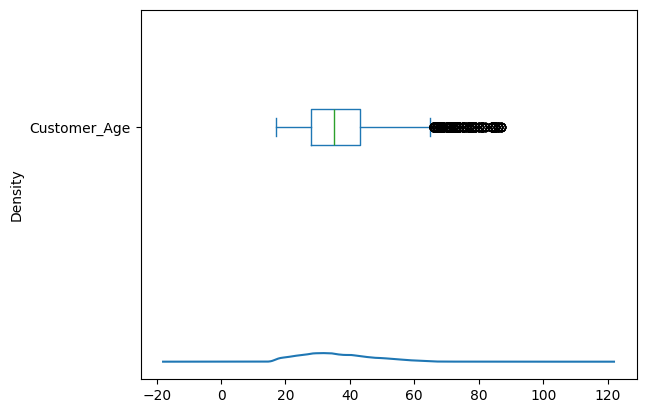

In [ ]:
sales['Customer_Age'].plot(kind='kde', figsize=(14,6))


In [ ]:
sales['Customer_Age'].plot(kind='box', vert = False, figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales per year do we have?

In [ ]:
sales['Year'].value_counts()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Create a list of every product sold

In [ ]:
#sales.loc[:, 'Product'].unique()

sales['Product'].unique()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Profit` per `Country`?

Show a grouped <b>box plot</b> per country with the profit values.

In [ ]:
# your code goes here
sales[['Profit', 'Country']].boxplot(by='Country')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add 7.2% TAX on every sale `Unit_Price` within United States

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add and calculate a new `Calculated_Date` column

Use `Day`, `Month`, `Year` to create a `Date` column (`YYYY-MM-DD`).

In [ ]:
# your code goes here
sales['Calculated_Date'] = sales['Year'].astype('str')+ '-'+sales['Month']+'-'+sales['Day'].astype('str')

In [ ]:
sales['Calculated_Date'] = sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)

sales['Calculated_Date'].head()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Parse your `Calculated_Date` column into a datetime object

In [ ]:
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])

sales['Calculated_Date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How did sales evolve through the years?

Show a <b>line plot</b> using `Calculated_Date` column as the x-axis and the count of sales as the y-axis.

<Axes: xlabel='Calculated_Date'>

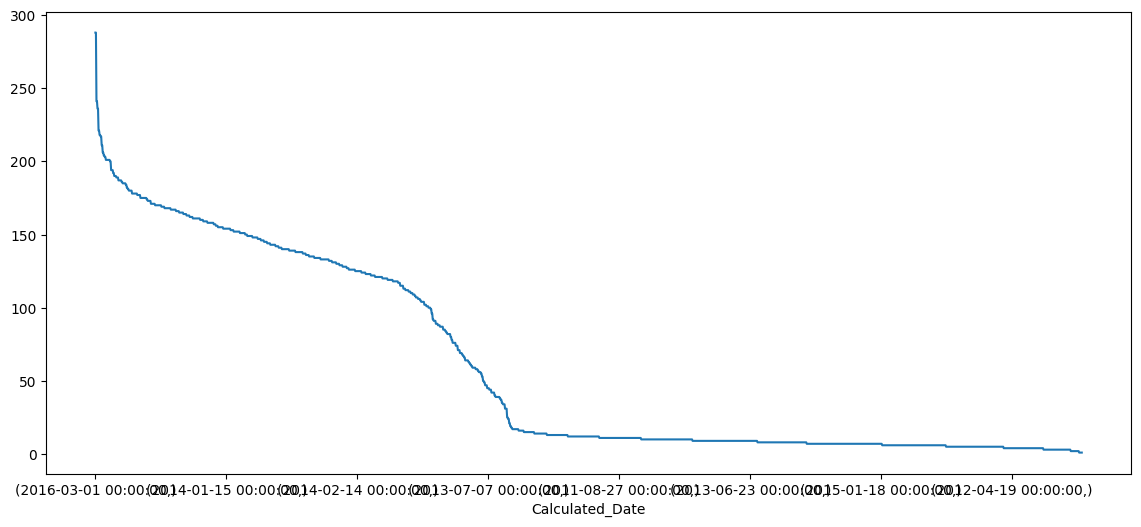

In [ ]:
# your code goes here (be careful here my code is wrong!!!)
sales[['Calculated_Date']].value_counts().plot(kind = 'line', figsize = (14,6)) # should not do it like this, because then the date become a single goup instead of 'time trend'

<Axes: xlabel='Calculated_Date'>

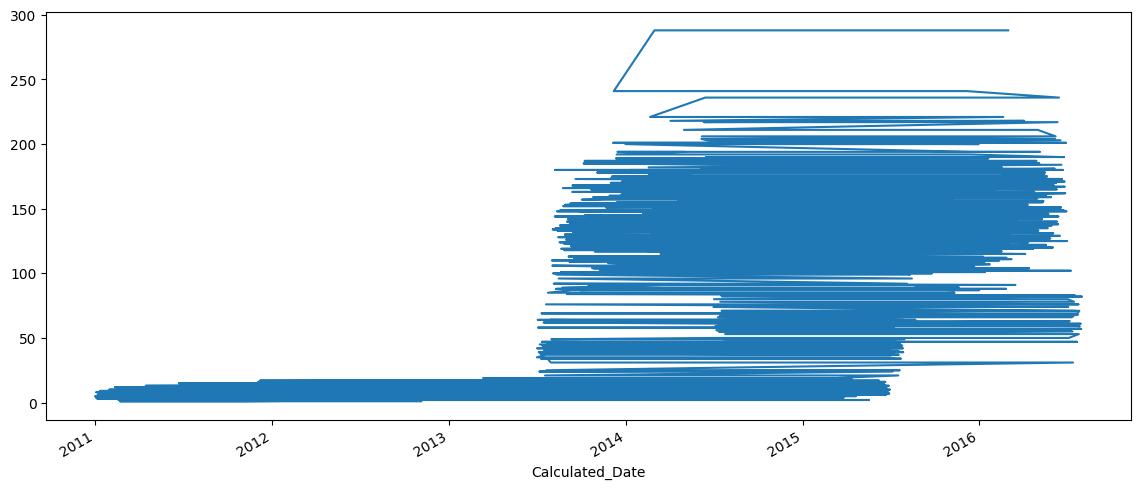

In [ ]:
sales['Calculated_Date'].value_counts().plot(kind='line', figsize=(14,6)) # the answer is correct although the graph looks crapy

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in `Canada` or `France`?

In [ ]:
sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]

25176

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get the top-5 sales with the highest revenue

In [ ]:
# your code goes here
sales.sort_values(['Revenue'], ascending=False).head(5)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made between May and July of 2016?

In [ ]:
cond = (sales['Year'] == 2016) & (sales['Month'].isin(['May', 'June', 'July'])) # be careful of how it is written

sales.loc[cond].shape[0]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add 7.2% TAX on every sale `Unit_Price` within United States

In [ ]:
#sales.loc[sales['Country'] == 'United States', 'Unit_Price'] = sales.loc[sales['Country'] == 'United States', 'Unit_Price'] * 1.072

sales.loc[sales['Country'] == 'United States', 'Unit_Price'] *= 1.072

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How is the replacement cost distributed?

- Show a <b>box plot</b> of the replacement costs.
- Show a <b>density plot</b> of the replacement costs.
- Add a red line on the <b>mean</b>.
- Add a green line on the median <b>median</b>.

In [ ]:
ax = df['film_replacement_cost'].plot(kind='density', figsize=(14,6))
ax.axvline(df['film_replacement_cost'].mean(), color='red')
ax.axvline(df['film_replacement_cost'].median(), color='green')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Does the film replacement cost vary depending on film rating?

In the United States, film classification is a voluntary process with the ratings issued by the Motion Picture Association of America (MPAA) via the Classification and Rating Administration (CARA).

- G (General Audiences): All Ages are Admitted.
- PG (Parental Guidance Suggested): Some Material May Not Be Suitable for Children.
- PG-13 (Parents Strongly Cautioned): Some Material May Be Inappropriate for Children Under 13.
- R (Restricted): Under 17 Requires Accompanying Parent or Adult Guardian.
- NC-17 (Adults Only): No One 17 and Under Admitted.

Show a <b>grouped box plot</b> per film rating with the film replacement costs.

In [ ]:
df[['film_replacement_cost', 'film_rating']].boxplot(by='film_rating', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many rentals of each film rating were made in Lethbridge city?

Show a <b>bar plot</b> with each film rating count.

In [ ]:
# your code goes here
df.loc[df['rental_store_city'] == 'Lethbridge', 'film_rating'].value_counts().plot(kind='bar', figsize=(14,6))